### Szeged Weather History

This is an practice notebook that seeks to predict Szeged's Apparent Temperature using Machine Learning. 

In [1]:
import pandas as pd

# load the training dataset
weather_data = pd.read_csv('data/weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Data Cleaning

Data was cleansed before data exploration. Main line of work is to see how much null values exist inside the dataset. It was found out that only 214 out of 90k rows were null. Imputing values on columns would be insignificant. Therefore, concerned values were droped.

In [2]:
#Explore null values
z = weather_data.isnull().sum()

In [3]:
weather_data['Daily Summary'].drop_duplicates().count()

214

In [4]:
#Drop Null Values
weather_data = weather_data.dropna(axis=0, how='any')
weather_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

**Feature extraction**

Features were categorized for data exploration.

In [5]:
num_feat = ['Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
cat_feat=['Summary', 'month', 'day']
weather_data[num_feat].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Column **"Formatted Date"** was parsed further to extract Month and Day feature to explore if month and days have significant correlation on the temperature change in Szeged.

In [6]:
weather_data['Formatted Date']=pd.to_datetime(weather_data['Formatted Date'], utc=True)
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
weather_data['month']=pd.DatetimeIndex(weather_data['Formatted Date']).month
weather_data['day']=pd.DatetimeIndex(weather_data['Formatted Date']).day
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3,31
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3,31
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4,1
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,1


### Data visualization

**Label** column were explored to remove outliers, and **feature** columns were explored to see if what are the relevant columns for the model.

<ipython-input-8-1f0c2e4e57b5>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


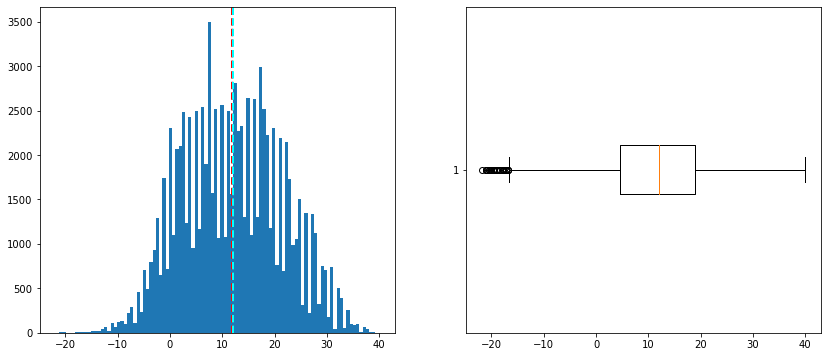

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

output=weather_data['Temperature (C)']

fig, ax=plt.subplots(1, 2, figsize=(14, 6))

ax[0].hist(output, bins=100)
ax[0].axvline(output.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(output.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(output, vert=False)

fig.show()

<ipython-input-9-77bb2e1925b9>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


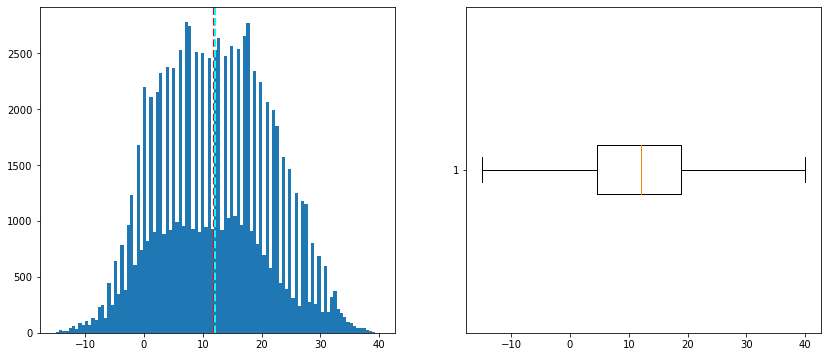

In [9]:
weather_data = weather_data[weather_data['Temperature (C)'] > -15]

%matplotlib inline

import matplotlib.pyplot as plt

output=weather_data['Temperature (C)']

fig, ax=plt.subplots(1, 2, figsize=(14, 6))

ax[0].hist(output, bins=100)
ax[0].axvline(output.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(output.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(output, vert=False)

fig.show()

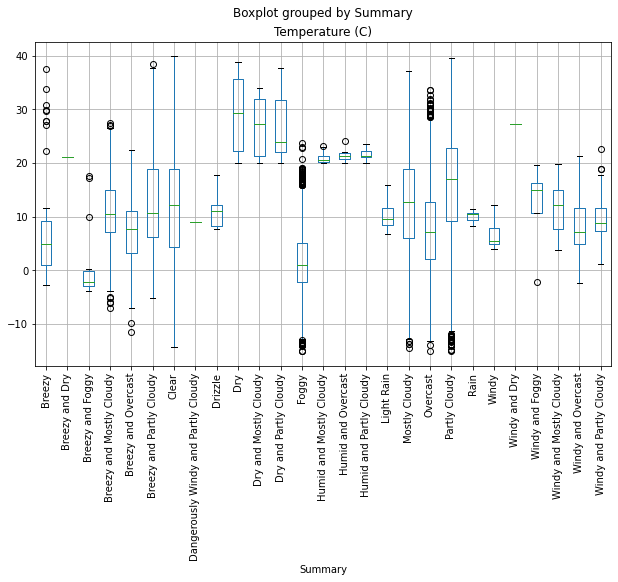

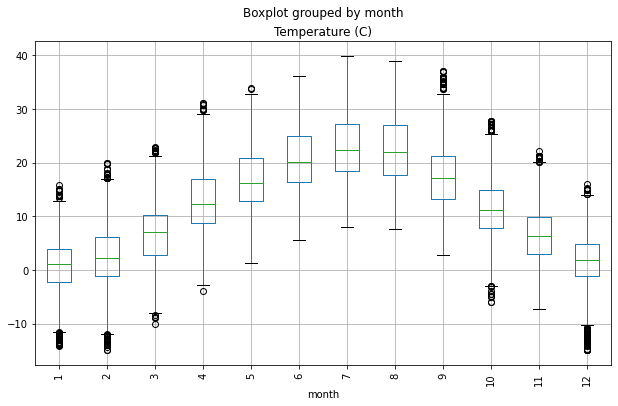

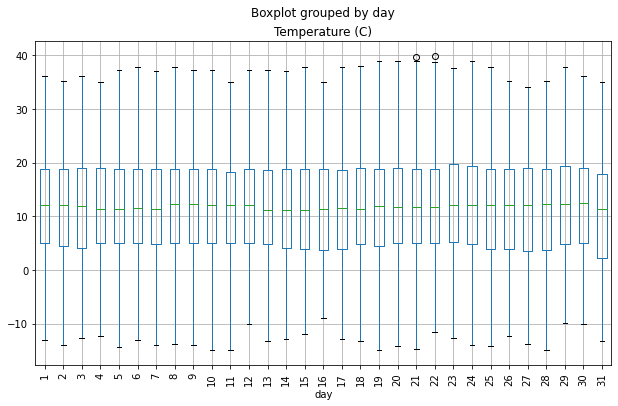

In [10]:
for f in cat_feat:
    fig= plt.figure(figsize=(10,6))
    ax=fig.gca()
    weather_data.boxplot(column='Temperature (C)', by = f, ax=ax)
    plt.xticks(rotation=90)
plt.show()

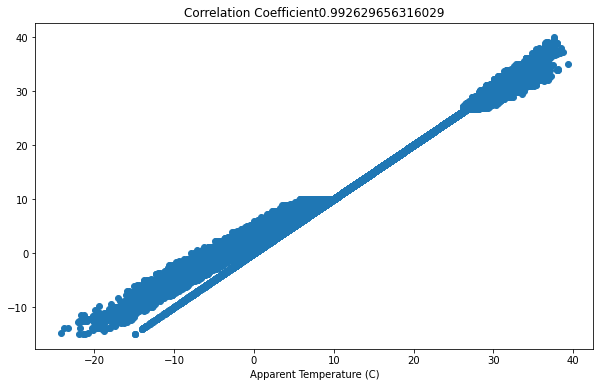

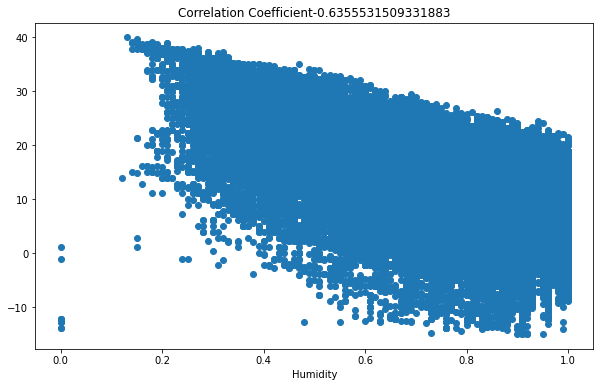

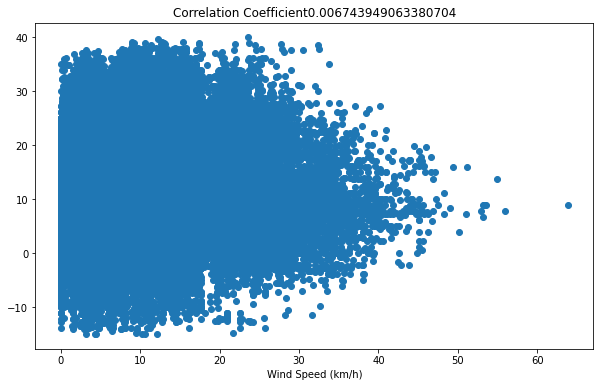

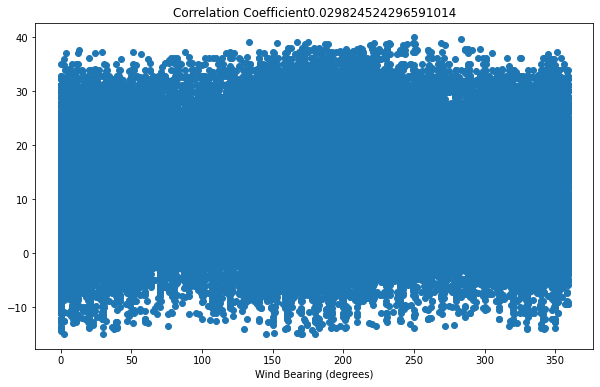

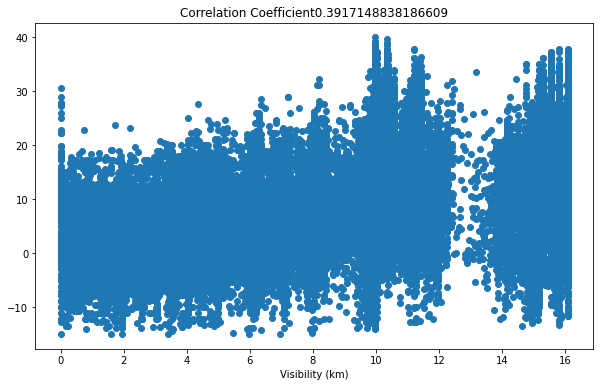

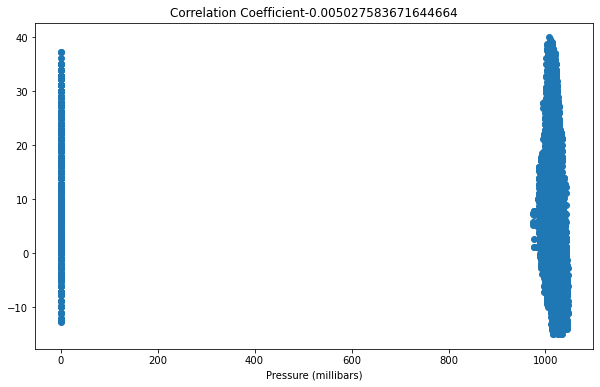

In [11]:
for fe in num_feat:
    fig= plt.figure(figsize=(10,6))    
    ax=fig.gca()
    features=weather_data[fe]
    ocol=weather_data['Temperature (C)']
    correlation = features.corr(ocol)
    plt.scatter(x=features, y=ocol)
    plt.xlabel(fe)
    ax.set_title('Correlation Coefficient' + str(correlation))
plt.show()

### Feature Engineering and Model Training

Based on the result of EDA, only columns 0 to 3 were used as a feature. The data set were then split into train and test set.

In [12]:
#Feature engineering
I, o = weather_data[['Summary', 'month', 'Apparent Temperature (C)', 'Humidity']].values, weather_data[['Temperature (C)']].values

In [13]:
#Train test split
from sklearn.model_selection import train_test_split
I_train, I_test, o_train, o_test = train_test_split(I, o, test_size=0.30, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (I_train.shape[0], I_test.shape[0]))

Training Set: 67108 rows
Test Set: 28761 rows


In [14]:
o_train[:5]

array([[25.73333333],
       [ 2.88333333],
       [16.21111111],
       [13.66666667],
       [15.        ]])

### Feature preprocessing and Algorithm Building.

ML pipeline was made to preprocess feature to scale them to make fitting easier. Sklearn's pipeline was used. 

**Also, .ravel() was added in the model fitting process to flatten the data into a 1D array**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [1,2,3]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(I_train, o_train.ravel())
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 0.6955274215547197
RMSE: 0.8339828664635262
R2: 0.9923840414411716
MAE: 0.48611499680074755


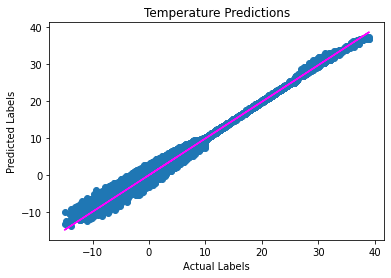

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Get predictions
predictions = model.predict(I_test)

# Display metrics
mse = mean_squared_error(o_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(o_test, predictions)
print("R2:", r2)
mae = mean_absolute_error(o_test, predictions)
print("MAE:", mae)

# Plot predicted vs actual
plt.scatter(o_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Temperature Predictions')
z = np.polyfit(o_test.ravel(), predictions, 1)
p = np.poly1d(z)
plt.plot(o_test,p(o_test), color='magenta')
plt.show()

In [17]:
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,o_test[:10])

Predicted labels:  [-2. 11. -9.  2. 13.  1.  3.  8. 11.  1.]
Actual labels   :  [[-0.52777778]
 [11.45555556]
 [-7.4       ]
 [ 2.08333333]
 [12.75555556]
 [ 1.55555556]
 [ 1.01666667]
 [ 8.32777778]
 [11.16111111]
 [-0.11111111]]
